In [2]:
import json

with open("../data/Việt Nam (tỉnh thành).geojson", "r") as f:
    data = json.load(f)

# Polygon

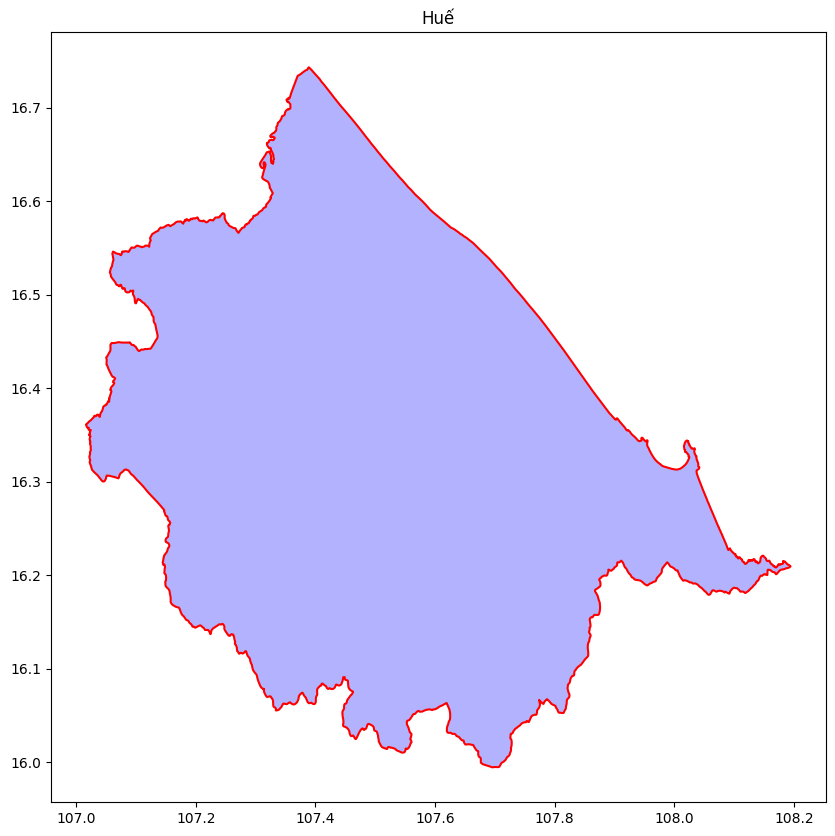

In [24]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
d = data['features'][14]
coords = d['geometry']['coordinates']
for x in coords:
    polygon = x[0]
    x, y = zip(*polygon)
    plt.fill(x, y, 'b', alpha=0.3)
    plt.plot(x + (x[0],), y + (y[0],), 'r-')

plt.title(d['properties']['ten'])
plt.show()

# Ray Casting

In [25]:
import numpy as np


def point_in_polygon(point, polygon):
    """
    Determine if a point is inside a polygon using the ray casting algorithm.

    Args:
        point: Tuple of (x, y) coordinates
        polygon: List of tuples representing the polygon's vertices

    Returns:
        True if point is inside polygon, False otherwise
    """
    x, y = point
    n = len(polygon)
    inside = False

    p1x, p1y = polygon[0]
    for i in range(n + 1):
        p2x, p2y = polygon[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xinters:
                        inside = not inside
        p1x, p1y = p2x, p2y

    return inside


def points_in_polygon(points, polygon):
    """
    Vectorized implementation for multiple points using NumPy.

    Args:
        points: Nx2 array of (x, y) coordinates
        polygon: List of tuples representing the polygon's vertices

    Returns:
        Boolean array indicating which points are inside the polygon
    """
    x, y = points[:, 0], points[:, 1]
    n = len(polygon)
    inside = np.zeros(len(points), dtype=bool)

    poly = np.array(polygon)
    p1x, p1y = poly[0]
    for i in range(n + 1):
        p2x, p2y = poly[i % n]
        mask = (y > min(p1y, p2y)) & (y <= max(p1y, p2y)) & (x <= max(p1x, p2x))
        xinters = (y[mask] - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
        inside[mask] ^= (p1x == p2x) | (x[mask] <= xinters)
        p1x, p1y = p2x, p2y

    return inside


In [30]:
point = (103.468, 9.2555)
point_in_polygon(point, polygon)

False

# Reverse Lat Long

In [ ]:
def get_city(lat, lon):
    for d in  data['features']:
        coords = d['geometry']['coordinates']

        name = d['properties']['ten']

        for x in coords:
            polygon = x[0]
            point = (lon, lat)
            if point_in_polygon(point, polygon):
                return name

In [29]:
get_city(10.7229372, 106.7425839)

'TP Hồ Chí Minh'